In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [2]:
ls ../dat/

benchmark.csv           casf_names.txt          geaux_pred_rmsd.json
casf.txt                geaux_native_rmsd.json  vina_rmsd.json


In [3]:
import json

In [4]:
vina_dat = json.loads(open("../dat/vina_rmsd.json").read())

In [5]:
vina_df = pd.DataFrame(vina_dat).T

In [6]:
vina_df.head()

,native_pocket_vina_rmsd,predicted_pocket_vina_rmsd
10gsA00,7.493246,7.515153
1a30A00,4.340904,4.556522
1bcuH00,2.636271,2.653116
1e66A01,0.925487,5.721366
1f8bA00,1.277627,4.744234


In [7]:
native_pocket_vina_rmsd = pd.DataFrame({"rmsd": vina_df.native_pocket_vina_rmsd,
                                       "Program": "AutoDock Vina",
                                       "Pocket": "Experimental"})
predicted_pocket_vina_rmsd = pd.DataFrame({"rmsd": vina_df.predicted_pocket_vina_rmsd,
                                          "Program": "AutoDock Vina",
                                          "Pocket": "Predicted"})

In [8]:
native_pocket_vina_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Experimental,AutoDock Vina,7.493246
1a30A00,Experimental,AutoDock Vina,4.340904
1bcuH00,Experimental,AutoDock Vina,2.636271
1e66A01,Experimental,AutoDock Vina,0.925487
1f8bA00,Experimental,AutoDock Vina,1.277627


In [9]:
predicted_pocket_vina_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Predicted,AutoDock Vina,7.515153
1a30A00,Predicted,AutoDock Vina,4.556522
1bcuH00,Predicted,AutoDock Vina,2.653116
1e66A01,Predicted,AutoDock Vina,5.721366
1f8bA00,Predicted,AutoDock Vina,4.744234


In [10]:
geaux_native_dat = json.loads(open("../dat/geaux_native_rmsd.json").read())

In [11]:
geaux_native_series = pd.Series(geaux_native_dat)

In [12]:
geaux_pred_dat = json.loads(open("../dat/geaux_pred_rmsd.json").read())
geaux_pred_series = pd.Series(geaux_pred_dat)

In [13]:
geaux_df = pd.DataFrame()

In [14]:
geaux_df['native'] = geaux_native_series

In [15]:
geaux_df['pred'] = geaux_pred_series

In [16]:
geaux_df.head()

,native,pred
10gsA00,0.3429,2.818350
1a30A00,5.3969,5.856387
1bcuH00,4.8245,3.244480
1e66A01,5.1086,7.049827
1f8bA00,0.1382,0.137759


In [17]:
native_pocket_geaux_rmsd = pd.DataFrame({"rmsd": geaux_df.native,
                                       "Program": "GeauxDock",
                                       "Pocket": "Experimental"})
predicted_pocket_geaux_rmsd = pd.DataFrame({"rmsd": geaux_df.pred,
                                          "Program": "GeauxDock",
                                          "Pocket": "Predicted"})

In [18]:
native_pocket_geaux_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Experimental,GeauxDock,0.3429
1a30A00,Experimental,GeauxDock,5.3969
1bcuH00,Experimental,GeauxDock,4.8245
1e66A01,Experimental,GeauxDock,5.1086
1f8bA00,Experimental,GeauxDock,0.1382


In [19]:
predicted_pocket_geaux_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Predicted,GeauxDock,2.818350
1a30A00,Predicted,GeauxDock,5.856387
1bcuH00,Predicted,GeauxDock,3.244480
1e66A01,Predicted,GeauxDock,7.049827
1f8bA00,Predicted,GeauxDock,0.137759


In [20]:
hued_df = pd.concat([native_pocket_geaux_rmsd, native_pocket_vina_rmsd,
                    predicted_pocket_geaux_rmsd, predicted_pocket_vina_rmsd],
                   axis=0)

In [21]:
hued_df.shape

(740, 3)

In [22]:
hued_df.head()

,Pocket,Program,rmsd
10gsA00,Experimental,GeauxDock,0.3429
1a30A00,Experimental,GeauxDock,5.3969
1bcuH00,Experimental,GeauxDock,4.8245
1e66A01,Experimental,GeauxDock,5.1086
1f8bA00,Experimental,GeauxDock,0.1382


In [23]:
df = pd.concat([geaux_df, vina_df], axis=1)
df.columns = ['GeauxDock(Native)', 'GeauxDock(Pred)', 'Vina(Native)', 'Vina(Pred)']

In [24]:
df.describe()

,GeauxDock(Native),GeauxDock(Pred),Vina(Native),Vina(Pred)
count,185.000000,185.000000,185.000000,185.000000
mean,2.584851,4.454688,2.928834,4.288701
std,2.496060,2.839403,2.542183,2.811065
min,0.056300,0.133529,0.270436,0.169694
25%,0.442100,2.422354,0.947880,2.034707
50%,1.983800,3.848627,1.977336,4.024962
75%,4.169200,6.081075,4.425672,6.380297
max,14.291000,17.414335,13.167786,13.961276


In [25]:
df.to_csv("../dat/benchmark.csv")

In [26]:
df.head()

,GeauxDock(Native),GeauxDock(Pred),Vina(Native),Vina(Pred)
10gsA00,0.3429,2.818350,7.493246,7.515153
1a30A00,5.3969,5.856387,4.340904,4.556522
1bcuH00,4.8245,3.244480,2.636271,2.653116
1e66A01,5.1086,7.049827,0.925487,5.721366
1f8bA00,0.1382,0.137759,1.277627,4.744234


In [27]:
df['complex'] = df.index.values

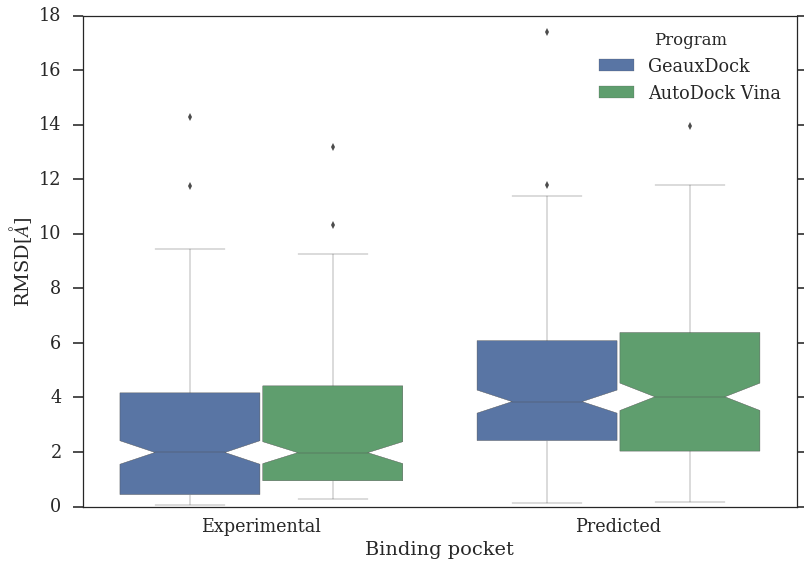

In [28]:
plt.figure()
sns.boxplot(data=hued_df, hue="Program", x='Pocket', y='rmsd', notch=True, linewidth=0.4)
plt.xlabel("Binding pocket")
plt.ylabel("RMSD[$\AA$]")